## 신용카드 거래 데이터 시각화

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
data

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [3]:
# Null 값 확인
data.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [4]:
# Installments replace null with 0
data = data.fillna(0)

In [5]:
data

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,0.0,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,0.0,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,0.0,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,0.0,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
store_id        int64
date            object
time            object
card_id         object
amount          int64
installments    float64
days_of_week    int64
holyday         int64
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


sales.plt()

# 데이터 분리

In [7]:
# 연도 데이터 쪼개기
def parse_year(date):
    year = date.split('-')[0]
    year = int(year)
    return year    

In [8]:
parse_year('2017-8-9')

2017

In [9]:
def parse_month(date):
    month = date.split('-')[1]
    month = int(month)
    return month 

In [10]:
parse_month('2017-8-9')

8

In [11]:
data['year'] = data['date'].apply(parse_year)
data['month'] = data['date'].apply(parse_month)
data

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,2016,12
...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,0.0,3,0,2018,7
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,0.0,3,0,2018,7
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,0.0,6,0,2018,7
3362794,1799,2018-07-25,18:09:13,57932602d6,300,0.0,2,0,2018,7


In [12]:
# 결제금액만
data = data.loc[data['amount'] >= 0]
data

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,0.0,2,0,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,0.0,0,0,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,0.0,0,0,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,0.0,0,0,2016,12
5,0,2016-12-19,13:36:39,30b1422f77,44,0.0,0,0,2016,12
...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,0.0,3,0,2018,7
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,0.0,3,0,2018,7
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,0.0,6,0,2018,7
3362794,1799,2018-07-25,18:09:13,57932602d6,300,0.0,2,0,2018,7


In [13]:
# 2016 데이터 불러오기
data_2016 = data.loc[data['year'] == 2016]
data_2016.shape

(451609, 10)

In [14]:
# 2017 데이터 불러오기
data_2017 = data.loc[data['year'] == 2017]
data_2017.shape

(1602787, 10)

In [15]:
# 2018 데이터 불러오기
data_2018 = data.loc[data['year'] == 2018]
data_2018.shape

(1274568, 10)

In [16]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [17]:
t = pd.pivot_table(data, index = 'year', columns = 'month', values = 'amount').round()
t

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,153.0,150.0,159.0,177.0
2017,170.0,166.0,160.0,156.0,150.0,145.0,149.0,146.0,146.0,146.0,150.0,164.0
2018,153.0,159.0,153.0,149.0,147.0,143.0,144.0,NaN,NaN,NaN,NaN,NaN


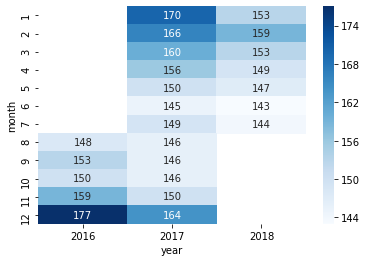

In [18]:
sns.heatmap(t.T, cmap = "Blues", annot = True, fmt = ".0f")

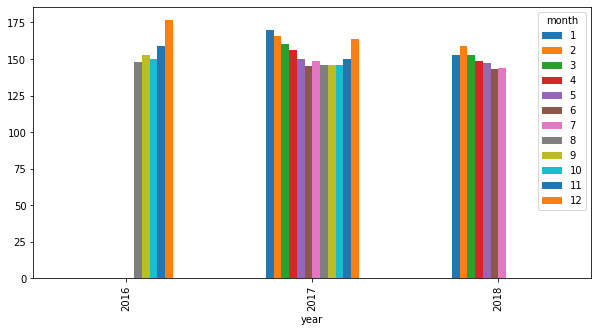

In [19]:
t.plot.bar(figsize = (10,5))

## 2017 데이터

In [20]:
data_2017

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month
1635,0,2017-01-01,00:27:46,1e3035e497,36,0.0,6,1,2017,1
1636,0,2017-01-01,00:40:24,357033166d,69,0.0,6,1,2017,1
1637,0,2017-01-01,00:44:38,3755cf6251,85,0.0,6,1,2017,1
1638,0,2017-01-01,01:05:36,a615f8b868,176,0.0,6,1,2017,1
1639,0,2017-01-01,01:25:39,66875ae804,123,0.0,6,1,2017,1
...,...,...,...,...,...,...,...,...,...,...
3362650,1799,2017-12-28,16:19:52,08f49c98a6,100,0.0,3,0,2017,12
3362651,1799,2017-12-29,15:03:49,09ba47a7e6,350,0.0,4,0,2017,12
3362652,1799,2017-12-31,14:35:56,4ab444c3ec,325,0.0,6,0,2017,12
3362653,1799,2017-12-31,15:03:10,fddd3a56e8,200,0.0,6,0,2017,12


In [21]:
amount_by_month = data_2017.groupby(['month'])['amount'].mean().round()


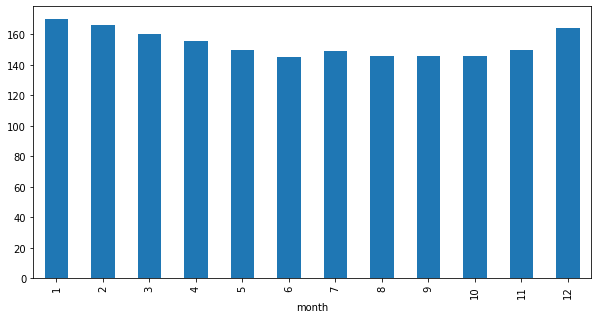

In [22]:
#월별 소비량
amount_by_month.plot.bar(figsize = (10,5))

In [23]:
amount_by_store = data_2017.groupby(['store_id'])['amount'].mean().round()

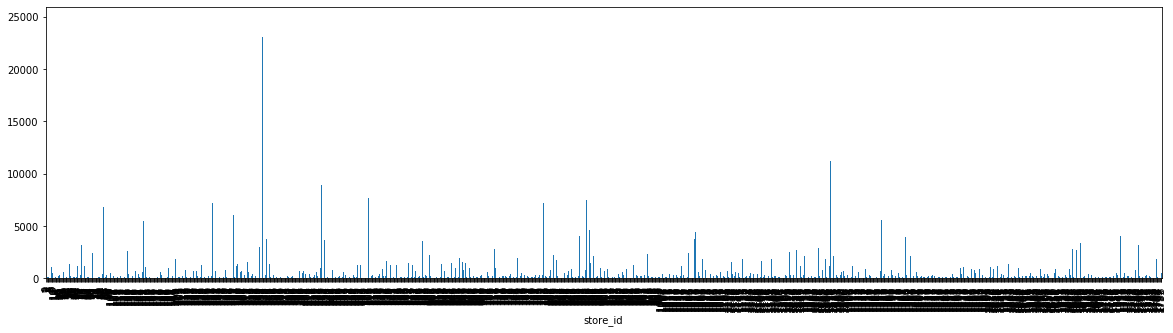

In [24]:
# 매장별 매출액
amount_by_store.plot.bar(figsize = (20,5))

In [25]:
# 할부 금액 별 소비액
amount_by_installments = data_2017.groupby(['installments'])['amount'].mean().round()

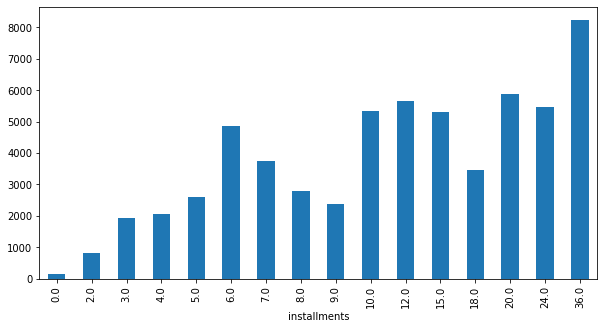

In [26]:
amount_by_installments.plot.bar(figsize = (10,5), )

## 시간대별 분리

In [27]:
def parse_time(time):
    time = time.split(':')[0]
    time = int(time)
    return time    

In [28]:
parse_time('00:27:46')

0

In [29]:
data_2017['hour'] = data_2017['time'].apply(parse_time)
data_2017

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,hour
1635,0,2017-01-01,00:27:46,1e3035e497,36,0.0,6,1,2017,1,0
1636,0,2017-01-01,00:40:24,357033166d,69,0.0,6,1,2017,1,0
1637,0,2017-01-01,00:44:38,3755cf6251,85,0.0,6,1,2017,1,0
1638,0,2017-01-01,01:05:36,a615f8b868,176,0.0,6,1,2017,1,1
1639,0,2017-01-01,01:25:39,66875ae804,123,0.0,6,1,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3362650,1799,2017-12-28,16:19:52,08f49c98a6,100,0.0,3,0,2017,12,16
3362651,1799,2017-12-29,15:03:49,09ba47a7e6,350,0.0,4,0,2017,12,15
3362652,1799,2017-12-31,14:35:56,4ab444c3ec,325,0.0,6,0,2017,12,14
3362653,1799,2017-12-31,15:03:10,fddd3a56e8,200,0.0,6,0,2017,12,15


In [30]:
# 시간대별 소비
amount_by_hour = data_2017.groupby(['hour'])['amount'].mean().round()

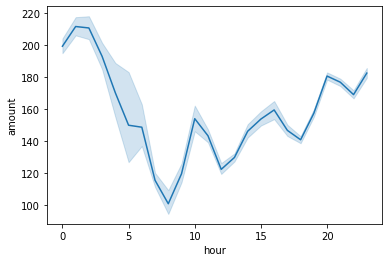

In [31]:
sns.lineplot(data = data_2017, x = 'hour', y = 'amount')

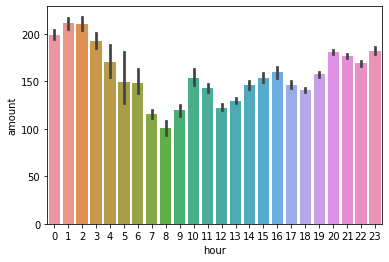

In [55]:
sns.barplot(data = data_2017, x = 'hour', y = 'amount')

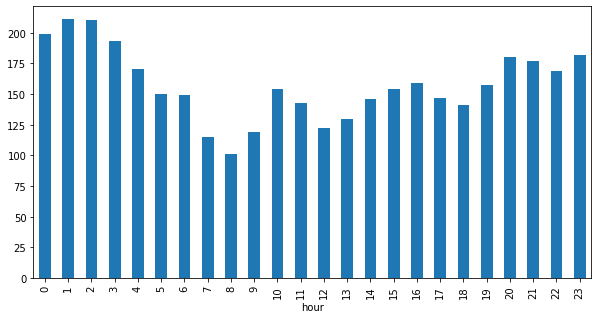

In [31]:
amount_by_hour.plot.bar(figsize = (10,5))

In [ ]:
# 오전 오후로 분리
spend_morning = data_2017.loc[data_2017['hour'] < 12].sum()

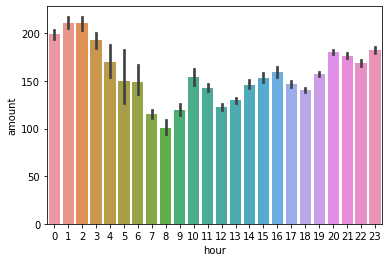

In [209]:
spend_afternoon = data_2017.loc[data_2017['hour'] > 12].sum()

## 환불 금액 

In [40]:
data_refund = pd.read_csv('train.csv')
data_refund

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [42]:
# 환불금액만
data_refund = data_refund.loc[data_refund['amount'] < 0]
data_refund

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
111,0,2016-12-20,21:06:16,5cb027b003,-108,NaN,1,0
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0
165,0,2016-12-21,11:58:13,3c4e290f01,-87,NaN,2,0
169,0,2016-12-21,12:04:30,3c4e290f01,-50,NaN,2,0
...,...,...,...,...,...,...,...,...
3362257,1798,2018-06-20,13:24:13,e494d92e30,-250,NaN,2,0
3362259,1798,2018-06-20,13:25:13,e494d92e30,-272,NaN,2,0
3362260,1798,2018-06-20,13:25:25,e494d92e30,-22,NaN,2,0
3362677,1799,2018-01-26,15:15:49,4d2e775ae2,-325,NaN,4,0


In [44]:
data_refund = data_refund.fillna(0)

In [45]:
data_refund

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0
111,0,2016-12-20,21:06:16,5cb027b003,-108,0.0,1,0
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0
165,0,2016-12-21,11:58:13,3c4e290f01,-87,0.0,2,0
169,0,2016-12-21,12:04:30,3c4e290f01,-50,0.0,2,0
...,...,...,...,...,...,...,...,...
3362257,1798,2018-06-20,13:24:13,e494d92e30,-250,0.0,2,0
3362259,1798,2018-06-20,13:25:13,e494d92e30,-272,0.0,2,0
3362260,1798,2018-06-20,13:25:25,e494d92e30,-22,0.0,2,0
3362677,1799,2018-01-26,15:15:49,4d2e775ae2,-325,0.0,4,0


In [47]:
data_refund['year'] = data_refund['date'].apply(parse_year)
data_refund['month'] = data_refund['date'].apply(parse_month)
data_refund['hour'] = data_refund['time'].apply(parse_time)


In [48]:
data_refund

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,hour
1,0,2016-12-14,18:05:54,d297bba73f,-5,0.0,2,0,2016,12,18
111,0,2016-12-20,21:06:16,5cb027b003,-108,0.0,1,0,2016,12,21
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0,2016,12,11
165,0,2016-12-21,11:58:13,3c4e290f01,-87,0.0,2,0,2016,12,11
169,0,2016-12-21,12:04:30,3c4e290f01,-50,0.0,2,0,2016,12,12
...,...,...,...,...,...,...,...,...,...,...,...
3362257,1798,2018-06-20,13:24:13,e494d92e30,-250,0.0,2,0,2018,6,13
3362259,1798,2018-06-20,13:25:13,e494d92e30,-272,0.0,2,0,2018,6,13
3362260,1798,2018-06-20,13:25:25,e494d92e30,-22,0.0,2,0,2018,6,13
3362677,1799,2018-01-26,15:15:49,4d2e775ae2,-325,0.0,4,0,2018,1,15


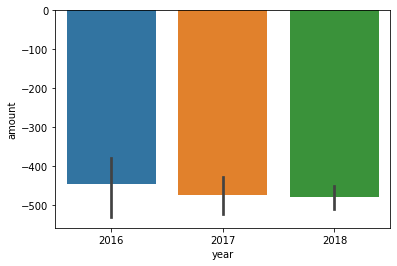

In [49]:
# 환불 연도
sns.barplot(data = data_refund, x = 'year', y = 'amount')

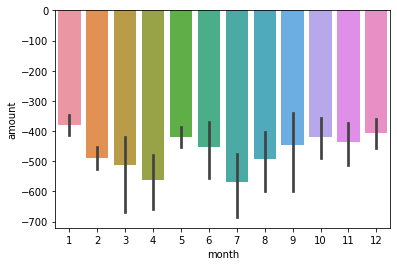

In [50]:
# 환불 월
sns.barplot(data = data_refund, x = 'month', y = 'amount')

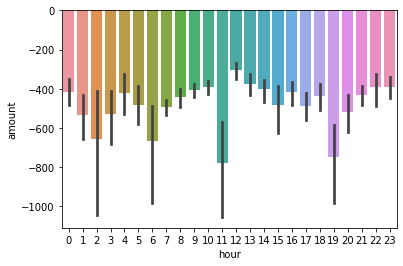

In [51]:
# 환불 시간
sns.barplot(data = data_refund, x = 'hour', y = 'amount')

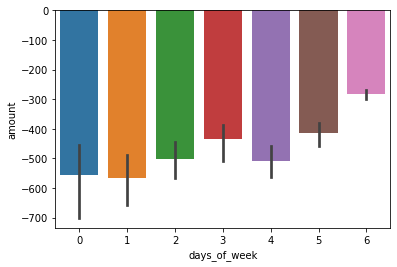

In [52]:
# 환불 요일
sns.barplot(data = data_refund, x = 'days_of_week', y = 'amount')

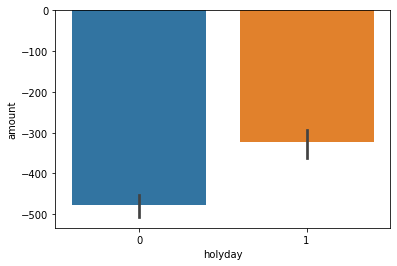

In [53]:
# 공휴일 환불
sns.barplot(data = data_refund, x = 'holyday', y = 'amount')